<a href="https://colab.research.google.com/github/itsaniketrathod/Capstone-Project-EDA/blob/main/AirBnB_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis on AirBnB Booking**

#### **Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.**

#### **This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values**

##### **Importing Libraries**

In [16]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### **Mounting Drive**

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

##### **Importing Dataset**

In [27]:
# Importing the dataset
airbnb_df = pd.read_csv('/content/drive/My Drive/Capstone Projects/Airbnb NYC 2019.csv')

In [28]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [29]:
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [30]:
# Information of the dataframe with features we will be using
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [31]:
# Shape of the dataframe
airbnb_df.shape

(48895, 16)

In [32]:
# Columns in the Dataframe
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## **Data Cleaning and Preprocessing**

In [33]:
# Columns with NaN values
airbnb_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

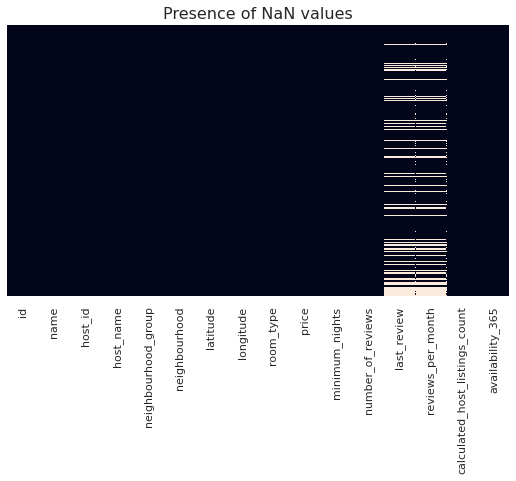

In [37]:
# Representing NaN values in heatmap
plt.figure(figsize=(9,5))
sns.heatmap(airbnb_df.isnull(),yticklabels=False,cbar=False)
plt.title("Presence of NaN values", size=16)
plt.show()

In [38]:
# Representing NaN values in tabular form
missing_values_df=(pd.DataFrame(airbnb_df.isna().sum())).reset_index()
missing_values_df.drop([4,5,6,7,8],axis=0,inplace=True)
missing_values_df.rename(columns={'index':"Column Name",0:'NaN Values'},inplace=True)
missing_values_df

,Column Name,NaN Values
0,id,0
1,name,16
2,host_id,0
3,host_name,21
9,price,0
10,minimum_nights,0
11,number_of_reviews,0
12,last_review,10052
13,reviews_per_month,10052
14,calculated_host_listings_count,0


In [39]:
# Filling the NaN values
airbnb_df['name'].fillna('Unavailable',inplace= True)
airbnb_df['host_name'].fillna('Unavailable',inplace= True)
airbnb_df['last_review'].fillna('2019-12-31',inplace = True)
airbnb_df['reviews_per_month'].fillna(0.0, inplace = True)

In [40]:
# Correcting date format in 'last_review' column
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])

In [41]:
# Checking NaN values
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

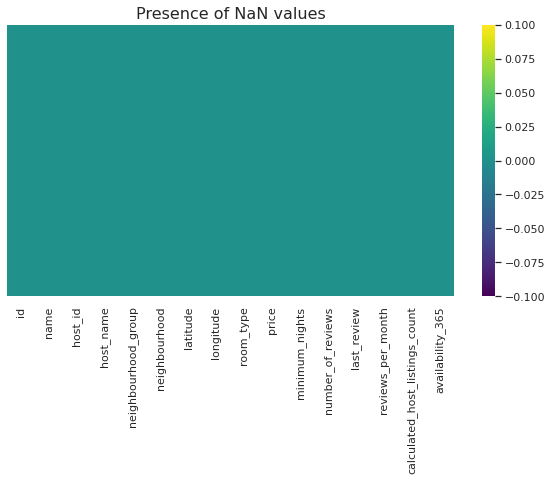

In [43]:
# Representing NaN values in heatmap
plt.figure(figsize=(10,5))
sns.heatmap(airbnb_df.isnull(),yticklabels=False,cmap='viridis')
plt.title("Presence of NaN values", size=16)
plt.show()